In [5]:
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,AdaBoostRegressor
import seaborn as sns

In [6]:
df_nonoverlapping_01 = pd.read_csv('../data/nonoverlapping/img_0_1.csv', index_col=0)
df_nonoverlapping_012 = pd.read_csv('../data/nonoverlapping/img_0_1_2.csv', index_col=0)
df_overlapping_01 = pd.read_csv('../data/overlapping/image01.csv', index_col=0)
df_overlapping_012 = pd.read_csv('../data/overlapping/image012.csv', index_col=0)

In [60]:
#helper function
    
#generate train test split
def gen_train_test(df):
    x = df.iloc[:,:64]
    y = df['label']
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=3)
    return x_train, x_test, y_train, y_test

#generate label
def gen_label_en(df):  
    df['img'] = df['img'].astype(str)
    label = preprocessing.LabelEncoder()
    df['label'] = label.fit_transform(df['img'].values.tolist())
    return df

#generate histogram
def gen_histo(df, col1:str, col2:str, title:str):
    fig, axs = plt.subplots(2, 1, sharey=True, tight_layout=True)
    axs[0].hist(df[col1])
    axs[0].title.set_text(str(title+" feature: "+col1))
    axs[1].hist(df[col2])
    axs[1].title.set_text(str(title+" feature: "+col2))
    fig.tight_layout()
    print(col1+ " Mean:{}".format(df[col1].mean().round(1)),"variance:{}".format(df[col1].var().round(1)))
    print(col2+ " Mean:{}".format(df[col2].mean().round(1)),"variance:{}".format(df[col2].var().round(1)))
    return plt.show()
  
#generate scatter plot
def gen_scatter(df1, df2, col1:str, col2:str, title:str):
    df1['img'] = df2
    sns.scatterplot( df1[col1], df1[col2], hue=df1['img'])
    plt.title(title)
    return plt.show()

def to_csv(df, file:str, sub):
    return df.to_csv('../data/'+sub+'/'+file)

In [56]:
df_nonoverlapping_01 = gen_label_en(df_nonoverlapping_01)
df_nonoverlapping_012 = gen_label_en(df_nonoverlapping_012)
df_overlapping_01 = gen_label_en(df_overlapping_01)
df_overlapping_012 = gen_label_en(df_overlapping_012)

In [63]:
x_train_nonover_01, x_test_nonover_01, y_train_nonover_01, y_test_nonover_01 = gen_train_test(df_nonoverlapping_01)
x_train_nonover_012, x_test_nonover_012, y_train_nonover_012, y_test_nonover_012 = gen_train_test(df_nonoverlapping_012)


x_train_over_01, x_test_over_01, y_train_over_01, y_test_over_01 = gen_train_test(df_overlapping_01)
x_train_over_012, x_test_over_012, y_train_over_012, y_test_over_012 = gen_train_test(df_overlapping_012)

In [62]:
to_csv(x_train_nonover_01, 'x_train_nonover_01.csv', 'train_non_overlapping')
to_csv(y_train_nonover_01, 'y_train_nonover_01.csv', 'train_non_overlapping')
to_csv(x_train_nonover_012, 'x_train_nonover_012.csv', 'train_non_overlapping')
to_csv(y_train_nonover_012, 'y_train_nonover_012.csv', 'train_non_overlapping')

to_csv(x_train_nonover_01, 'x_test_nonover_01.csv', 'test_non_overlapping')
to_csv(y_train_nonover_01, 'y_test_nonover_01.csv', 'test_non_overlapping')
to_csv(x_train_nonover_012, 'x_test_nonover_012.csv', 'test_non_overlapping')
to_csv(y_train_nonover_012, 'y_test_nonover_012.csv', 'test_non_overlapping')

to_csv(x_train_nonover_01, 'x_train_over_01.csv', 'train_overlapping')
to_csv(y_train_nonover_01, 'y_train_over_01.csv', 'train_overlapping')
to_csv(x_train_nonover_012, 'x_train_over_012.csv', 'train_overlapping')
to_csv(y_train_nonover_012, 'y_train_over_012.csv', 'train_overlapping')

to_csv(x_train_nonover_01, 'x_test_over_01.csv', 'test_overlapping')
to_csv(y_train_nonover_01, 'y_test_over_01.csv', 'test_overlapping')
to_csv(x_train_nonover_012, 'x_test_over_012.csv', 'test_overlapping')
to_csv(y_train_nonover_012, 'y_test_over_012.csv', 'test_overlapping')


### Histgram

54 Mean:184.5 variance:1443.8
56 Mean:184.7 variance:1432.8


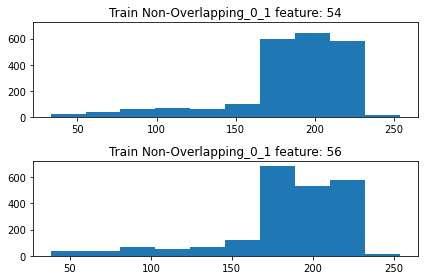

54 Mean:183.1 variance:1627.5
56 Mean:183.2 variance:1650.1


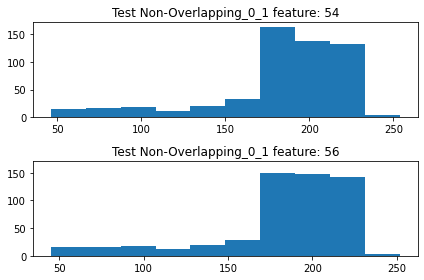

In [51]:
gen_histo(x_train_nonover_01, '54', '56', 'Train Non-Overlapping_0_1')
gen_histo(x_test_nonover_01, '54', '56', 'Test Non-Overlapping_0_1')

54 Mean:173.2 variance:1974.9
56 Mean:173.5 variance:1961.0


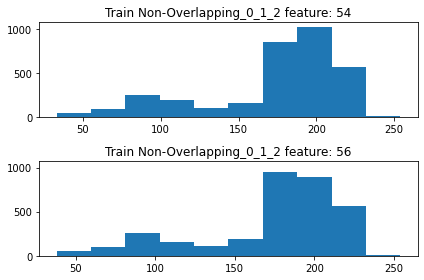

54 Mean:173.6 variance:1983.4
56 Mean:174.0 variance:1943.1


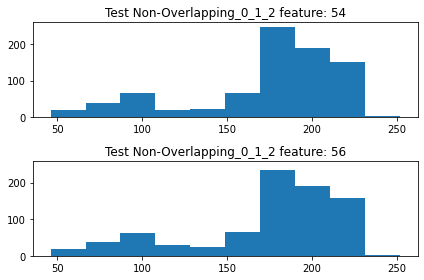

In [52]:
gen_histo(x_train_nonover_012, '54', '56', 'Train Non-Overlapping_0_1_2')
gen_histo(x_test_nonover_012, '54', '56', 'Test Non-Overlapping_0_1_2')

54 Mean:184.1 variance:1536.8
56 Mean:184.1 variance:1552.5


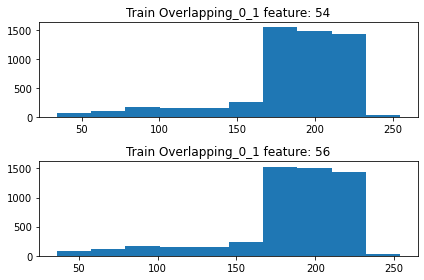

54 Mean:184.2 variance:1453.8
56 Mean:184.8 variance:1403.3


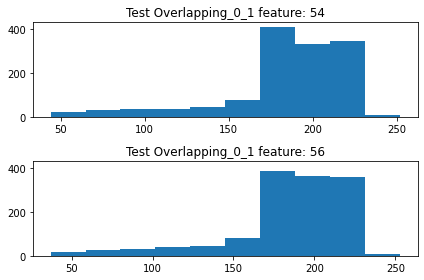

In [53]:
gen_histo(x_train_over_01, '54', '56', 'Train Overlapping_0_1')
gen_histo(x_test_over_01, '54', '56', 'Test Overlapping_0_1')

54 Mean:172.6 variance:2035.2
56 Mean:172.9 variance:2035.0


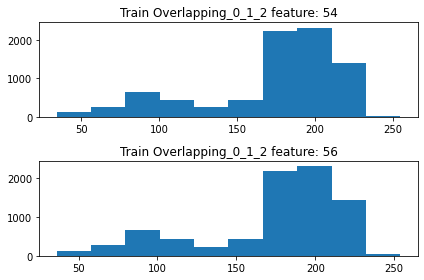

54 Mean:174.5 variance:1913.6
56 Mean:173.8 variance:1974.6


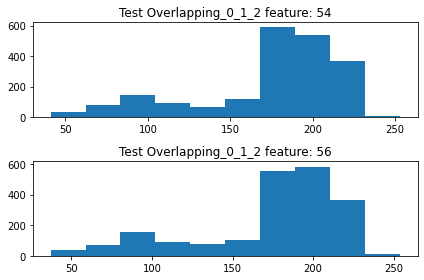

In [54]:
gen_histo(x_train_over_012, '54', '56', 'Train Overlapping_0_1_2')
gen_histo(x_test_over_012, '54', '56', 'Test Overlapping_0_1_2')

### Scatter Plot

2021-11-01 16:14:48,414 [1596] WARNING  py.warnings:110: [JupyterRequire] /Users/vathanahim/opt/anaconda3/envs/MSIA/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning



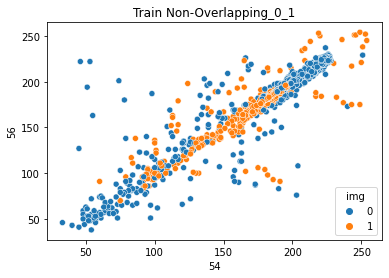

2021-11-01 16:14:48,666 [1596] WARNING  py.warnings:110: [JupyterRequire] /Users/vathanahim/opt/anaconda3/envs/MSIA/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning



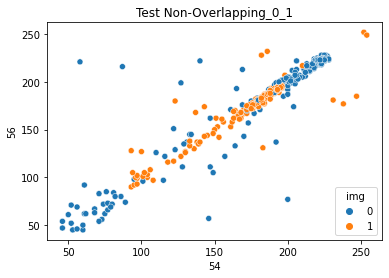

In [14]:
gen_scatter(x_train_nonover_01,y_train_nonover_01, '54', '56', 'Train Non-Overlapping_0_1')
gen_scatter(x_test_nonover_01,y_test_nonover_01, '54', '56', 'Test Non-Overlapping_0_1')

2021-11-01 16:14:49,906 [1596] WARNING  py.warnings:110: [JupyterRequire] /Users/vathanahim/opt/anaconda3/envs/MSIA/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning



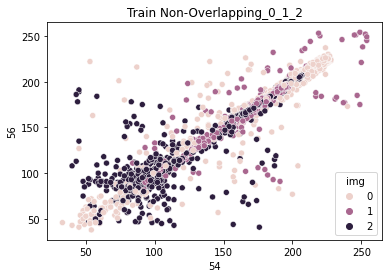

2021-11-01 16:14:50,208 [1596] WARNING  py.warnings:110: [JupyterRequire] /Users/vathanahim/opt/anaconda3/envs/MSIA/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning



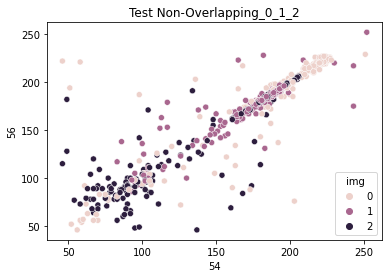

In [15]:
gen_scatter(x_train_nonover_012,y_train_nonover_012, '54', '56', 'Train Non-Overlapping_0_1_2')
gen_scatter(x_test_nonover_012,y_test_nonover_012, '54', '56', 'Test Non-Overlapping_0_1_2')

2021-11-01 16:14:51,087 [1596] WARNING  py.warnings:110: [JupyterRequire] /Users/vathanahim/opt/anaconda3/envs/MSIA/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning



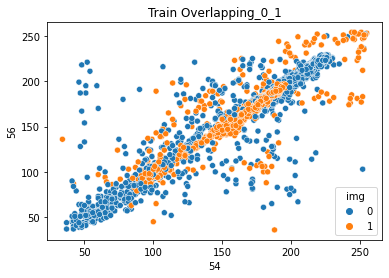

2021-11-01 16:14:51,484 [1596] WARNING  py.warnings:110: [JupyterRequire] /Users/vathanahim/opt/anaconda3/envs/MSIA/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning



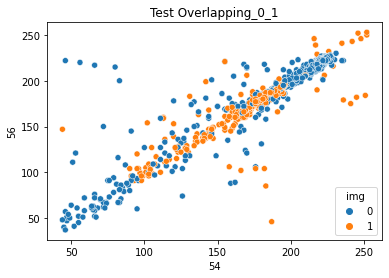

In [16]:
gen_scatter(x_train_over_01,y_train_over_01, '54', '56', 'Train Overlapping_0_1')
gen_scatter(x_test_over_01,y_test_over_01, '54', '56', 'Test Overlapping_0_1')

2021-11-01 16:14:52,223 [1596] WARNING  py.warnings:110: [JupyterRequire] /Users/vathanahim/opt/anaconda3/envs/MSIA/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning



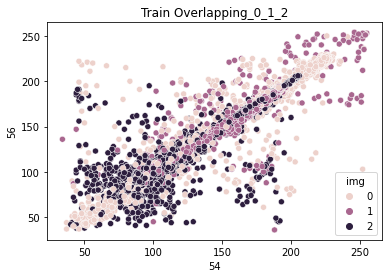

2021-11-01 16:14:52,636 [1596] WARNING  py.warnings:110: [JupyterRequire] /Users/vathanahim/opt/anaconda3/envs/MSIA/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning



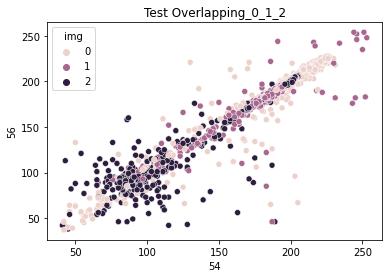

In [17]:
gen_scatter(x_train_over_012,y_train_over_012, '54', '56', 'Train Overlapping_0_1_2')
gen_scatter(x_test_over_012,y_test_over_012, '54', '56', 'Test Overlapping_0_1_2')

In [24]:
class elasticnet() :
      
    def __init__( self, learning_rate, iterations, l1_penality ) :
          
        self.learning_rate = learning_rate 
        self.iterations = iterations
        self.l1_penality = l1_penality
    # Function for model training
              
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features
        self.m, self.n = X.shape
        # weight initialization 
        self.W = np.zeros( self.n )
        self.b = 0
        self.X = X
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) : 
            self.update_weights()   
        return self
      
      
    def update_weights( self ) :
             
        Y_pred = self.predict( self.X )
        # calculate gradients  
        dW = np.zeros( self.n )
        for j in range( self.n ) :  
            if self.W[j] > 0 :
                dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) )          
                         + self.l1_penality ) / self.m
            else :
                dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) ) 
                         - self.l1_penality ) / self.m
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m    
        # update weights     
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db 
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :
        return X.dot( self.W ) + self.b
      



#function for feature selection
def feature_selection(x_train, y_train, x_test):
    sel = SelectFromModel(SGDClassifier(max_iter=1000, tol=1e-3,loss="log", penalty="elasticnet"))
    sel.fit(x_train, y_train)
    x_train_rcf = sel.transform(x_train)
    x_test_rcf = sel.transform(x_test)
    print(x_train.columns[sel.get_support()])
    return x_train_rcf, x_test_rcf

#function to scale data
def scale_data(x_train, x_test):
        scaler = StandardScaler()
        scaler.fit(x_train)
        x_train = scaler.transform(x_train)
        x_test = scaler.transform(x_test)
        return x_train, x_test

#elastic_classifier with given x and y data
def Elastic_Classifier(x_train, y_train, x_test, y_test):
    clf = SGDClassifier(max_iter=1000, tol=1e-3,loss="log", penalty="elasticnet")
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    print("Accuracy : ", accuracy_score(y_test,y_pred))
    print(classification_report(y_test, y_pred))
    
    #display confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]

    class_names = [0,1]

    for title, normalize in titles_options:
        disp = plot_confusion_matrix(clf, x_test, y_test,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)

    return plt.show()
    
    
    
#function for feature selection for random forest
def feature_selection_rm(x_train, y_train, x_test):
#     sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))
    sel = SelectFromModel(AdaBoostRegressor(random_state=3, n_estimators=50))
    sel.fit(x_train, y_train)
    x_train_rcf = sel.transform(x_train)
    x_test_rcf = sel.transform(x_test)
    return x_train_rcf, x_test_rcf

#generate random forest model with given x and y test dataset
def Random_forest(x_train, y_train, x_test, y_test):
    clf = RandomForestClassifier(n_estimators=100, bootstrap = True, max_depth = 110, min_samples_leaf = 4
                             , min_samples_split = 10, random_state=0, n_jobs=1)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
  

    print("Accuracy : ", accuracy_score(y_test,y_pred))
    print(classification_report(y_test, y_pred))
    
    #display confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    
    if(len(y_test.unique()) == 2):
        class_names = [0,1]
    else:
        class_names = [0,1,2]

    for title, normalize in titles_options:
        disp = plot_confusion_matrix(clf, x_test, y_test,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)

    return plt.show()
    

## Elastic Net Classifier 

### Non-Overlapping Image 1 and 0

In [71]:
x_train, x_test = feature_selection(x_train_nonover_01,y_train_nonover_01,x_test_nonover_01)
x_train_scaled, x_test_scaled = scale_data(x_train, x_test)


Index(['1', '2', '3', '4', '6', '7', '9', '10', '13', '14', '19', '23', '26',
       '27', '33', '42', '44', '46', '47', '49', '51', '55', '56', '57', '58',
       '60', '61', '62'],
      dtype='object')


Accuracy :  0.720508166969147
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       272
           1       0.71      0.75      0.73       279

    accuracy                           0.72       551
   macro avg       0.72      0.72      0.72       551
weighted avg       0.72      0.72      0.72       551



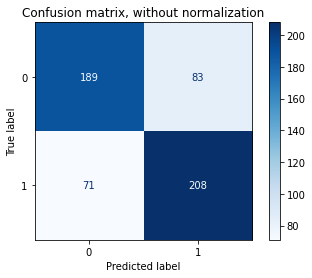

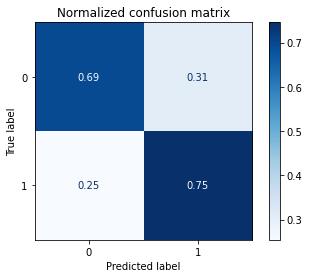

In [72]:
Elastic_Classifier(x_train_scaled, y_train_nonover_01, x_test_scaled, y_test_nonover_01)

### Overlapping Image 1 and 0

In [70]:
x_train, x_test = feature_selection(x_train_over_01,y_train_over_01,x_test_over_01)

Index(['0', '2', '7', '10', '11', '15', '20', '23', '29', '32', '33', '35',
       '39', '42', '43', '44', '46', '47', '49', '50', '51', '53', '55', '57',
       '58', '59'],
      dtype='object')


Accuracy :  0.6294117647058823
              precision    recall  f1-score   support

           0       0.60      0.73      0.66       664
           1       0.68      0.53      0.59       696

    accuracy                           0.63      1360
   macro avg       0.64      0.63      0.63      1360
weighted avg       0.64      0.63      0.63      1360



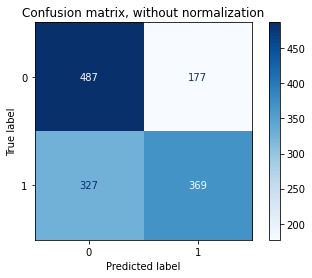

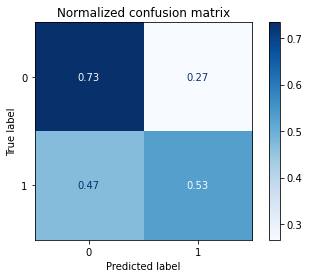

In [69]:
x_train_scaled, x_test_scaled = scale_data(x_train, x_test)
Elastic_Classifier(x_train_scaled, y_train_over_01, x_test_scaled, y_test_over_01)

## Random Forest Classifier

### Non-Overlapping Image 0 1

Accuracy :  0.9237749546279492
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       272
           1       0.89      0.96      0.93       279

    accuracy                           0.92       551
   macro avg       0.93      0.92      0.92       551
weighted avg       0.93      0.92      0.92       551



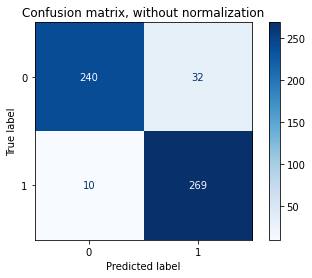

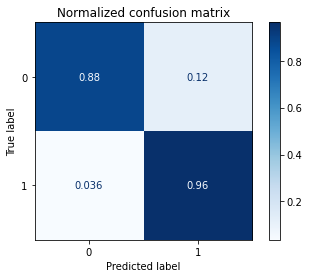

In [73]:
x_train, x_test = feature_selection_rm(x_train_nonover_01,y_train_nonover_01,x_test_nonover_01)
x_train_scaled, x_test_scaled = scale_data(x_train, x_test)

#train test on scale data
Random_forest(x_train_scaled, y_train_nonover_01, x_test_scaled, y_test_nonover_01)

### Overlapping Image 0 1

Accuracy :  0.9235294117647059
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       664
           1       0.90      0.96      0.93       696

    accuracy                           0.92      1360
   macro avg       0.93      0.92      0.92      1360
weighted avg       0.93      0.92      0.92      1360



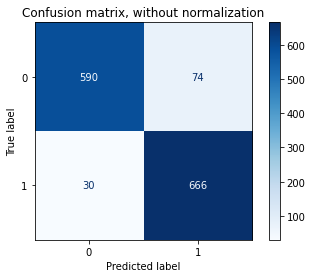

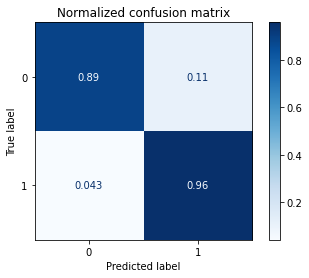

In [74]:
x_train, x_test = feature_selection_rm(x_train_over_01,y_train_over_01,x_test_over_01)
x_train_scaled, x_test_scaled = scale_data(x_train, x_test)
#train test on scale data
Random_forest(x_train_scaled, y_train_over_01, x_test_scaled, y_test_over_01)

### Non-overlapping image 0,1,2

Accuracy :  0.7808716707021792
              precision    recall  f1-score   support

           0       0.89      0.75      0.82       281
           1       0.74      0.79      0.76       279
           2       0.73      0.80      0.76       266

    accuracy                           0.78       826
   macro avg       0.79      0.78      0.78       826
weighted avg       0.79      0.78      0.78       826



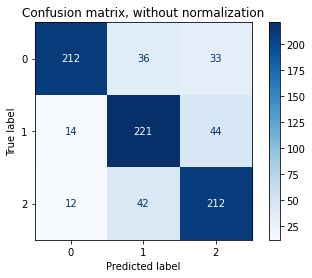

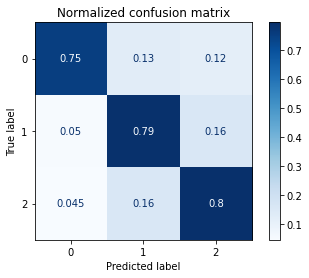

In [76]:
x_train, x_test = feature_selection_rm(x_train_nonover_012,y_train_nonover_012,x_test_nonover_012)
x_train_scaled, x_test_scaled = scale_data(x_train, x_test)

#train test on scale data
Random_forest(x_train_scaled, y_train_nonover_012, x_test_scaled, y_test_nonover_012)

### Overlapping image 0,1,2

Accuracy :  0.8357843137254902
              precision    recall  f1-score   support

           0       0.94      0.82      0.87       677
           1       0.77      0.88      0.82       693
           2       0.82      0.81      0.81       670

    accuracy                           0.84      2040
   macro avg       0.84      0.84      0.84      2040
weighted avg       0.84      0.84      0.84      2040



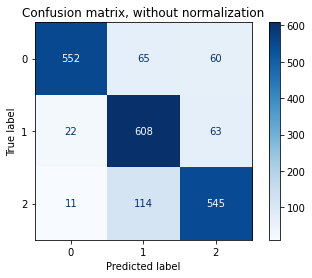

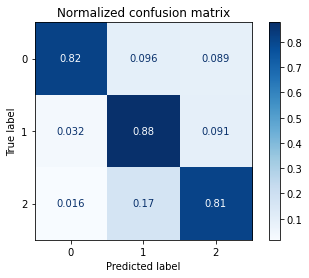

In [77]:
x_train, x_test = feature_selection_rm(x_train_over_012,y_train_over_012,x_test_over_012)
x_train_scaled, x_test_scaled = scale_data(x_train, x_test)

#train test on scale data
Random_forest(x_train_scaled, y_train_over_012, x_test_scaled, y_test_over_012)